<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 3 - African American Experience The Beginning of Exploratory Data Analysis
**Erick Watt-Udogu**


Save for the future: https://www.irs.gov/statistics/soi-tax-stats-migration-data

https://hdpulse.nimhd.nih.gov/data-portal/social/table?age=001&age_options=ageall_1&demo=00010&demo_options=income_3&race=02&race_options=race_7&sex=0&sex_options=sexboth_1&socialtopic=030&socialtopic_options=social_6&statefips=00&statefips_options=area_states

https://www.thearda.com/us-religion/maps/us-state-maps?m1=2_2_6_2020

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/mapping/110/tavg/202008/1/value

# Setup, Import, Manipulation and Merge

## Setup Code

I was more deliberate about the setup code than normal. Instead of dumping old code and hoping from the best, now that I have done this for the third class it makes more sense.  

In [3]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.patches as mpatches

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

!pip install adjustText
from adjustText import adjust_text

!pip install tabula-py
import tabula

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=75ed9377ef664687bde4edba5776f4b25a7e3d748bb46db9d953b2b923ac8dad
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 81.6 MB/s eta 0:00:00


## Importing

### African-American Population by State and Over Time (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In the wake of the murder of Michael Brown by Ferguson, Missouri police officer Darren Wilson, I have been fascinated with the question of African American geographic data. I was astonished that when the killing occurred in 2014, the majority-Black district did not have a single Black person in municipal leadership. This seemed odd to me, but upon further review, I noticed that states with the highest African American populations often did not have African Americans elected statewide. Furthermore, many of these states were in the southern United States—an area known to be politically conservative. This was interesting to me, and this data read helps me examine this data in greater detail.

In [53]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


In [54]:
#Looks good. I only imported what was necessary, so this was easy.
aaprison.dtypes

,0
State,object
Black (non-Hispanic),float64


### African American Prison Percentages by State (XLS)

Source: Prison Policy Initiative https://www.prisonpolicy.org/blog/2023/09/27/updated_race_data/

In theory, if a subsection of a population makes up 13% of the universe that population should make up 13% of the prison population, it should have a proportionate amount of political power, wealth, high school graduation, etc. But that is not the case for women, African Americans, and other minoritized groups. That is well known, but what is less well known is the degree to which that differs. This project is the first step to uncovering those differences.

This dataset pulled from the Prison Policy Initiative helps me to interrogate the difference between African American population rates and the prison population rates for that same community. This is prison data pulled in 2021.

In [55]:
aaprison = pd.read_excel('https://www.prisonpolicy.org/data/race_bystate_2021.xlsx', sheet_name='Percentages', skiprows=3, usecols='A,G')
aaprison.head(5)

,State,Black (non-Hispanic)
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


### US Map (SHP)

**Source: US Census: **https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

The population data is organized by state, I want to see all the data mapped literally.

Limitation: This data does have interesting data for Alaska and Hawaii, but the maps do not render well with those two states included. I am going to find a shapefile that compensates for this in the future.

In [56]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [57]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

### African-American Religiosity (HTML)

Source: https://www.thearda.com/us-religion/maps/us-state-maps?m1=2_2_6_2020

I am interested in how religiosity interacts with these other variables e.g. prison, population, etc. The Association of Religion Data Archives(ARDA) has a goal of providing data about religion in the United States and arounf the world. The data used in this study is entitled, "Black Protestant: Adherence Rate per 1,000 (2020)."

According to the ARDA Black Protestants are those churches that largely minister to Black members. The major denominations are:

1.   African Methodist Episcopal Church
2.   African Methodist Episcopal Zion Church
3. Christian Methodist Episcopal Church
4. Church of God in Christ
5. National Baptist Convention of America
6. National Baptist Convention, USA, Inc.
7. Progressive National Baptist Convention, Inc.

Note: A limitation of this data is that there is no information for Vermont. I can see that from the maps the ARDA produced.


**Black ProtestantCongregations (2020)**
Source: https://www.thearda.com/us-religion/group-profiles/traditions?T=6
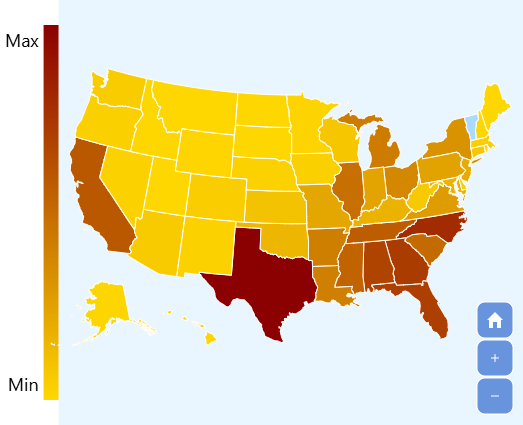

**Black Protestant Adherence Rate per 1,000 (2020)**
Source: https://www.thearda.com/us-religion/group-profiles/traditions?T=6

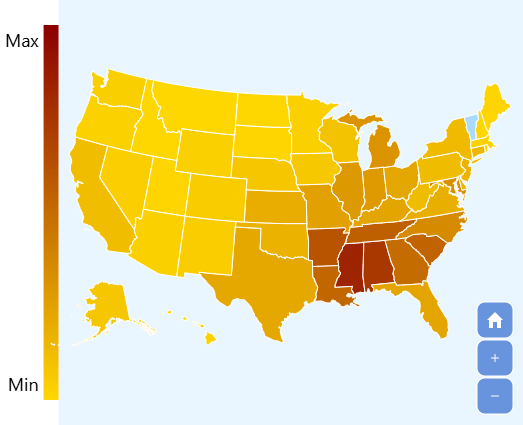

In [58]:
#Looks ready to import. I know from the maps that Vermont is missing. I am not averse to keeping it off since the Black population in that state is so small.
aaprotestant = pd.read_html('https://www.thearda.com/us-religion/maps/us-state-maps?m1=2_2_6_2020',match="State")[0].head(65)
aaprotestant.head(5)

,Rank,State,Value
0,1,District Of Columbia,104.23
1,2,Mississippi,87.15
2,3,Alabama,76.66
3,4,Arkansas,63.30
4,5,Tennessee,57.36


### State Party Composition (PDF)
Source: https://www.ncsl.org/about-state-legislatures/state-partisan-composition

I want to see if there are any relationships between state government political control and the other variables such as population and prison population, etc. The National Council of State Legislatures maintains this data and has this data on its website from 2009 to 2025. The dataset details the political makeup of the state legislatures and executive branch for all the states.

Furrer, et al (2023) caution against the binary that I am doing in this project. I am making the choice here to make this dichotomous for the sake of parsimony for this project, but in a dissertation, I think the unit of analysis will have to be smaller than state and I rather than making it categorical, I will use data points.

**For further review:**

Akshay R. Rao, Red, blue and purple states of mind: Segmenting the political marketplace, Journal of Consumer Psychology, Volume 27, Issue 4, 2017,Pages 521-531, ISSN 1057-7408, https://doi.org/10.1016/j.jcps.2017.08.001.

Furrer RA, Schloss K, Lupyan G, Niedenthal PM, Wood A. Red and blue states: dichotomized maps mislead and reduce perceived voting influence. Cogn Res Princ Implic. 2023 Feb 9;8(1):11. doi: 10.1186/s41235-023-00465-2. PMID: 36754923; PMCID: PMC9908792.



In [117]:
#I was able to get this PDF extraction code from https://colab.research.google.com/github/Jonchyk/Datamgmt/blob/main/PS2Complex.ipynb#scrollTo=qOV77LSLJCkM.
#This is going to need some manipulating. I might want to dig down in this in my dissertation, but for this project. I think I am going to focus on using this as categorical data.
!wget --no-check-certificate "https://documents.ncsl.org/wwwncsl/Elections/Legis_Control_2020_April%201.pdf" -O leg2020.pdf
leg = tabula.read_pdf('leg2020.pdf', multiple_tables=False, stream=True)
leg[0].head()

--2025-03-03 01:47:52--  https://documents.ncsl.org/wwwncsl/Elections/Legis_Control_2020_April%201.pdf
Resolving documents.ncsl.org (documents.ncsl.org)... 13.107.246.66, 2620:1ec:bdf::66
Connecting to documents.ncsl.org (documents.ncsl.org)|13.107.246.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204657 (200K) [application/pdf]
Saving to: ‘leg2020.pdf’

leg2020.pdf         100%[===================>] 199.86K  --.-KB/s    in 0.003s  

2025-03-03 01:47:52 (56.7 MB/s) - ‘leg2020.pdf’ saved [204657/204657]



,Unnamed: 0,Total,Total.1,Senate,Senate.1,Senate.2,Total House,House,Unnamed: 8,House.1,Legis.,Gov.,State
0,STATE,Seats,Senate,Dem.,Rep.,other,House Dem.,Rep.,NaN,other,Control,Party,Control
1,Alabama,140,35,8,27,NaN,105 28,77,NaN,NaN,Rep,Rep,Rep
2,Alaska,60,20,7,13,NaN,40 15,23,NaN,2,Rep,Rep,Rep
3,Arizona,90,30,13,17,NaN,60 29,31,NaN,NaN,Rep,Rep,Rep
4,Arkansas,135,35,9,26,NaN,100 24,76,NaN,NaN,Rep,Rep,Rep


## Manipulating Data: Before Merging

### State Party Composition Cleaning and Slicing

In [118]:
leg[0].columns = leg[0].columns.astype(str) + '_' + leg[0].iloc[0].astype(str)
leg[0].head()

,Unnamed: 0_STATE,Total_Seats,Total.1_Senate,Senate_Dem.,Senate.1_Rep.,Senate.2_other,Total House_House Dem.,House_Rep.,Unnamed: 8_nan,House.1_other,Legis._Control,Gov._Party,State_Control
0,STATE,Seats,Senate,Dem.,Rep.,other,House Dem.,Rep.,NaN,other,Control,Party,Control
1,Alabama,140,35,8,27,NaN,105 28,77,NaN,NaN,Rep,Rep,Rep
2,Alaska,60,20,7,13,NaN,40 15,23,NaN,2,Rep,Rep,Rep
3,Arizona,90,30,13,17,NaN,60 29,31,NaN,NaN,Rep,Rep,Rep
4,Arkansas,135,35,9,26,NaN,100 24,76,NaN,NaN,Rep,Rep,Rep


In [119]:
#I want to remove the row 0 it is not data, it's merge error.
leg[0] = leg[0].drop(0)

In [42]:
leg[0].head()

,Unnamed: 0_STATE,Total_Seats,Total.1_Senate,Senate_Dem.,Senate.1_Rep.,Senate.2_other,Total House_House Dem.,House_Rep.,Unnamed: 8_nan,House.1_other,Legis._Control,Gov._Party,State_Control
1,Alabama,140,35,8,27,NaN,105 28,77,NaN,NaN,Rep,Rep,Rep
2,Alaska,60,20,7,13,NaN,40 15,23,NaN,2,Rep,Rep,Rep
3,Arizona,90,30,13,17,NaN,60 29,31,NaN,NaN,Rep,Rep,Rep
4,Arkansas,135,35,9,26,NaN,100 24,76,NaN,NaN,Rep,Rep,Rep
5,California,120,40,29,10,1v,80 61,18,NaN,1,Dem,Dem,Dem


In [120]:
#I want the numbers here for future study, largely because of Furrer, et al (2023).
#I want to make the leg dataset, Unnamed: 0_State and State_Control
leg[0] = leg[0].rename(columns={'Unnamed: 0_STATE': 'State', 'State_Control': 'Party'})
leg[0].head()

,State,Total_Seats,Total.1_Senate,Senate_Dem.,Senate.1_Rep.,Senate.2_other,Total House_House Dem.,House_Rep.,Unnamed: 8_nan,House.1_other,Legis._Control,Gov._Party,Party
1,Alabama,140,35,8,27,NaN,105 28,77,NaN,NaN,Rep,Rep,Rep
2,Alaska,60,20,7,13,NaN,40 15,23,NaN,2,Rep,Rep,Rep
3,Arizona,90,30,13,17,NaN,60 29,31,NaN,NaN,Rep,Rep,Rep
4,Arkansas,135,35,9,26,NaN,100 24,76,NaN,NaN,Rep,Rep,Rep
5,California,120,40,29,10,1v,80 61,18,NaN,1,Dem,Dem,Dem


In [121]:
#I want to create a leg df from leg[0]
leg = leg[0]

In [122]:
#I want to create the leg2020 df that includes State and Party only.
leg2020 = leg[['State', 'Party']]
leg2020.head()

,State,Party
1,Alabama,Rep
2,Alaska,Rep
3,Arizona,Rep
4,Arkansas,Rep
5,California,Dem


### Manipulating African American Religiosity Data

In [ ]:
#Looks good. I wanted to make sure Value was a number.
aaprotestant.dtypes

,0
Rank,int64
State,object
Value,float64


In [142]:
#In aaprotestant, I want to rename Value to Rel so the merge makes sense.
aaprotestant = aaprotestant.rename(columns={'Value': 'Rel'})
aaprotestant.head()

,Rank,State,Rel
0,1,District Of Columbia,104.23
1,2,Mississippi,87.15
2,3,Alabama,76.66
3,4,Arkansas,63.30
4,5,Tennessee,57.36


### Manipulating African American Population Data: Replacing and Slicing

**Making the Numerical Data Calculatable**

When I imported this data, the numbers were saved as text, so I wouldn't be able to analyze it. This code remedies that.

In [60]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [61]:
#I wasn't planning on updating all the years, but the AI made it easy. It seems to anticipate that I wanted to change it.
aapop['1790'] = aapop['1790'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1800'] = aapop['1800'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1810'] = aapop['1810'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1820'] = aapop['1820'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1830'] = aapop['1830'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1840'] = aapop['1840'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1850'] = aapop['1850'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1860'] = aapop['1860'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1870'] = aapop['1870'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1880'] = aapop['1880'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1890'] = aapop['1890'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1900'] = aapop['1900'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1910'] = aapop['1910'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1920'] = aapop['1920'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1930'] = aapop['1930'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1940'] = aapop['1940'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1950'] = aapop['1950'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1960'] = aapop['1960'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1970'] = aapop['1970'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1980'] = aapop['1980'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1990'] = aapop['1990'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2000'] = aapop['2000'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2010'] = aapop['2010'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2020'] = aapop['2020'].str.replace('[\%]', '', regex=True).astype(float)

In [62]:
#This looks right.
aapop.describe()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,19.000000,26.000000,29.000000,30.000000,31.000000,32.000000,38.000000,45.000000,49.000000,49.000000,...,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,56.000000,57.000000,57.000000,53.000000
mean,15.352632,16.534615,18.372414,17.683333,19.345161,18.687500,15.992105,13.171111,12.526531,12.571429,...,9.496154,9.253846,9.374510,9.728846,10.021154,10.365385,11.315536,12.007193,12.637018,12.771698
std,14.957806,15.993872,17.620299,17.930807,19.389737,19.595008,18.826640,18.269306,18.141318,18.416354,...,13.434999,12.874621,11.839068,11.991375,12.524444,12.395586,14.720913,14.392811,13.805798,10.193218
min,0.300000,0.400000,0.300000,0.300000,0.200000,0.200000,0.000000,0.000000,0.100000,0.200000,...,0.100000,0.000000,0.000000,0.100000,0.200000,0.200000,0.020000,0.040000,0.020000,1.200000
25%,2.350000,2.950000,2.900000,2.200000,1.650000,1.075000,0.600000,0.300000,0.600000,0.500000,...,0.400000,0.400000,0.850000,1.525000,1.750000,1.800000,2.150000,2.500000,2.900000,5.000000
50%,9.500000,8.900000,13.000000,11.900000,15.500000,12.600000,3.700000,1.600000,1.800000,1.900000,...,3.400000,3.600000,4.400000,5.200000,6.350000,6.900000,6.850000,7.500000,8.700000,9.700000
75%,24.200000,30.150000,32.200000,32.700000,35.400000,33.125000,27.275000,24.900000,22.500000,22.500000,...,13.950000,13.725000,13.200000,12.700000,13.175000,14.025000,15.075000,15.600000,16.100000,17.200000
max,43.700000,44.600000,55.200000,52.800000,58.500000,56.400000,58.900000,58.600000,58.900000,60.700000,...,50.200000,49.200000,45.300000,53.900000,71.100000,70.300000,76.620000,76.190000,76.030000,44.200000


**Slicing African African American Population Data**

I sliced this data in three ways:

1.   Removed all the states and kept the aggregate country data with all the time data intact.
2.   Removed the country data and kept the disaggregated states and territory data over time.
4. Created a darta frame that only included states, territories and population data for 2020.




***US African American Population Data Manipulation***

In [63]:
#I want just United States aapop
usaapop = aapop[aapop['State/Territory'] == 'United States of America']

In [64]:
#I want to create a line graph so of USAAPOP so I need to stack it
usaapop = usaapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

In [65]:
usaapop.head(5)

,State/Territory,Year,Percentage
0,United States of America,1790,19.3
1,United States of America,1800,18.9
2,United States of America,1810,19.0
3,United States of America,1820,18.4
4,United States of America,1830,18.1


***African American Population by State Data Slice and Manipulation***

In [66]:
# In aapop I want to remove United States, it is the aggregate
aapop = aapop[aapop['State/Territory'] != 'United States of America']

***2020 African American Population Data Slice for Merge***

This slice is designed for me to merge with prison population and US shapefiles. In the future, I want to use this to merge wit ha number of other variables.

In [68]:
#I need the aapop data to include just state and 2020.
aapop2020 = aapop[['State/Territory', '2020']]
aapop2020.head()

,State/Territory,2020
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


In [69]:
#I need to get aapop2020 ready to merge. I want to rename State/Terrirory to State and 2020 to Pop.
aapop2020 = aapop2020.rename(columns={'State/Territory': 'State', '2020': 'Pop'})
aapop2020.head()

,State,Pop
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


### African American Prison Population Data Limitations and Renaming Columns

**Limitation:** This dataset includes state prison population for 50 states and excludes Washington DC and territories. Washington DC is not a state and doesn't have state prisons. Later we wil see that the prison population in Maryland is abnormally high, perhaps its high Black population and proximity to DC contributes to the large difference. This is an area for further study.

In [71]:
#Only 50 observations, so probably no DC and definitely no territories. DC is a loss since it has such a high Black population. Territories, not so much.
aaprison.describe()

,Black (non-Hispanic)
count,50.000000
mean,0.317464
std,0.198303
min,0.026895
25%,0.117305
50%,0.297669
75%,0.488053
max,0.709000


In [72]:
#I want to rename Black (non-Hispanic) in aaprison to Prison
aaprisonmerge = aaprison.rename(columns={'Black (non-Hispanic)': 'Prison'})
aaprisonmerge.head()

,State,Prison
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


### Manipulating the US SHP File for Merging

In [73]:
# I have used this file before. I am renaming the Name column for merge
US = US.rename(columns={'NAME':'State'})

In [74]:
US.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
STUSPS,object
State,object
LSAD,object
ALAND,int64
AWATER,int64
geometry,geometry


## Merging Data Sets

### Merge African American Population with African American Prison Data

In [232]:
#I want to merge aaprisonmerge and aapop2020 on outer with State as the common field.
aapopprison = pd.merge(aaprisonmerge, aapop2020, on='State', how='outer',indicator=True)
aapopprison.head(5)

,State,Prison,Pop,_merge
0,Alabama,0.533437,26.8,both
1,Alaska,0.100237,4.8,both
2,American Samoa,NaN,NaN,right_only
3,Arizona,0.149997,6.2,both
4,Arkansas,0.397779,16.5,both


### Merging Four and Five Datasets: State Political Leaning with African American Population, Prison Population and Religiosity

**Merging State Political Leaning**

In [239]:
#I want to merge outer aapopprison with leg2020
#Change indicator='_mergeindicator' so there is no conflict.
#This looks right, by definition the NCSL data only includes states. American Samoa would be missing.
#DF name is getting too complicated. New df name will be for everything.
nation = pd.merge(aapopprison, leg2020, on='State', how='outer',indicator='_mergeindicator')
nation.head(5)

,State,Prison,Pop,_merge,Party,_mergeindicator
0,Alabama,0.533437,26.8,both,Rep,both
1,Alaska,0.100237,4.8,both,Rep,both
2,American Samoa,NaN,NaN,right_only,NaN,both
3,Arizona,0.149997,6.2,both,Rep,both
4,Arkansas,0.397779,16.5,both,Rep,both


In [240]:
#I want to merge aaprotestant with nation outer on State
nation = pd.merge(nation, aaprotestant, on='State', how='outer')
nation.dtypes

,0
State,object
Prison,float64
Pop,float64
_merge,category
Party,object
_mergeindicator,category
Rank,float64
Rel,float64


In [241]:
#I want to see the left and right only in the _merge field in nation
nation['_mergeindicator'].value_counts()

,count
_mergeindicator,
both,58
right_only,4
left_only,2


In [137]:
#In nation, I want to see all the values that are right_only
#These look right and don't skew my analysis. No States.
nation[nation['_mergeindicator'] == 'right_only']['State'].unique()

array(['Mariana Islands', 'Total States', 'U.S. Territories',
       'Virgin Islands'], dtype=object)

In [138]:
#In nation, I want to see all the values that are left_only
#These look right and don't skew my analysis. No States.
nation[nation['_mergeindicator'] == 'left_only']['State'].unique()

array(['Northern Mariana Islands', 'Virgin Islands (U.S.)'], dtype=object)

In [139]:
#In nation, I want to see all the values that are right only on _merge
#These look right and don't skew my analysis. No States.
nation[nation['_merge'] == 'right_only']['State'].unique()

array(['Northern Mariana Islands', 'Virgin Islands (U.S.)'], dtype=object)

In [140]:
#In nation, I want to see all the values that are right only on _merge
#Theis looks right.
nation[nation['_merge'] == 'left_only']['State'].unique()

array([nan], dtype=object)

### Merging Three Data Sets: African American Population and Prison Percentage and a US Shape File

In [242]:
#I am going to merge US with nation on state
nation = pd.merge(US, nation, on='State', how='outer',indicator='indicator_column') # Change indicator=True to indicator='indicator_column'
nation.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
STUSPS,object
State,object
LSAD,object
ALAND,float64
AWATER,float64
geometry,geometry


In [243]:
#I want to look at the details in my _merge field
nation['_merge'].value_counts()

,count
_merge,
both,51
right_only,5
left_only,4


In [244]:
#I want to know the values in the state field nation of the _merge field that are right_only
#This makes sense. While there is some data for Black population, it's not in the prison set, and most of these have small populations and aren't states.
nation[nation['_merge'] == 'right_only']['State'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands (U.S.)'], dtype=object)

In [245]:
#I want to know the values in the state field nation of the _merge firls that are left_only
#This makes sense.
nation[nation['_merge'] == 'left_only']['State'].unique()

array([nan], dtype=object)

In [246]:
#I only want to look at states, not territories.
#I removed HI and AK, but if I do this for further study. I can't remove them, but the map looks off when I include them.
#I also had to remove DC because my prison data didn't have prison data for DC.
nation = nation[~nation['State'].isin(['Alaska','District of Columbia','Hawaii','Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]

## Manipulating Data: After Merging

### General Cleaning

In [248]:
#Prison nation needs to be multiplied by 100 and rounded to one decimal place.
nation['Prison'] = nation['Prison'] * 100
nation['Prison'] = nation['Prison'].round(1)

In [237]:
#I need to look at the descriptive statistics of the Prison field
nation['Prison'].describe()

,Prison
count,50.000000
mean,31.748000
std,19.833843
min,2.700000
25%,11.725000
50%,29.750000
75%,48.800000
max,70.900000


In [156]:
#I need to remove all 0 and Nan values from aapropprison Pop and Prison columns. THese will be terriroties and DC. The territories are not an issue for the purpose of the study but DC is.
nation = nation.dropna(subset=['Pop', 'Prison'])

### Creating New Calculated Fields to Compare Population and Prison Percentage Variables

I want to measure the difference between Back population in a state and the prison population. I created two fields to help:

1.  Difference = African American Prison Population - Population of the State
2.  Prison/Pop = African American Prison Population / Population of the State

In theory if 5% of a state's population is Black so too should it's prison population be 5% but in every one of the 50 states, the Black prison population exceeds its expected proportion. "Difference" calculates the difference between these two numbers and to help measure distance from the expected value and "Prison/Pop" measures the percentages relative to one another.


In [249]:
#In nation I want to add a column that subtracts Pop from Prison and another that divides prison over pop
nation['Difference'] = nation['Prison'] - nation['Pop'].round(2)
nation['Prison/Pop'] = nation['Prison'] / nation['Pop'].round(2)

In [250]:
nation.describe().round(2)

,ALAND,AWATER,Prison,Pop,Rank,Rel,Difference,Prison/Pop
count,4.800000e+01,4.800000e+01,48.00,48.00,48.00,48.00,48.00,48.00
mean,1.594541e+11,8.915133e+09,32.77,12.35,25.04,22.07,20.41,2.94
std,1.211158e+11,1.597770e+10,19.58,9.48,14.66,24.52,11.64,0.81
min,2.677780e+09,4.890285e+08,2.70,1.20,1.00,0.19,1.40,1.62
25%,9.989061e+10,1.746214e+09,14.65,5.30,12.75,3.55,8.75,2.41
50%,1.396196e+11,3.707035e+09,30.45,9.70,24.50,14.62,20.25,2.79
75%,2.076105e+11,8.963612e+09,49.50,16.68,37.25,29.67,29.80,3.34
max,6.766532e+11,1.038859e+11,70.90,37.90,50.00,104.23,46.10,5.27


### Mapping Categorical Data: Census Regions and Divisions

In the appendix I have some early scatterplots using Kmeans clustering. The clusters seemed to not be mathematically random but based on proximity, so I wanted to find a way to group the states and found a list of Census Regions and Divisions. I mapped the Census categories accordingly.

In [251]:
#I am going to map the states to Census designated divisions https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
#AI made this mapping easy, it was only partially manual.
division_mapping = {
    "Connecticut": "New England", "Maine": "New England", "Massachusetts": "New England",
    "New Hampshire": "New England", "Rhode Island": "New England", "Vermont": "New England",

    "New Jersey": "Middle Atlantic", "New York": "Middle Atlantic", "Pennsylvania": "Middle Atlantic",

    "Illinois": "East North Central", "Indiana": "East North Central", "Michigan": "East North Central",
    "Ohio": "East North Central", "Wisconsin": "East North Central",

    "Iowa": "West North Central", "Kansas": "West North Central", "Minnesota": "West North Central",
    "Missouri": "West North Central", "Nebraska": "West North Central",
    "North Dakota": "West North Central", "South Dakota": "West North Central",

    "Delaware": "South Atlantic", "District of Columbia": "South Atlantic", "Florida": "South Atlantic",
    "Georgia": "South Atlantic", "Maryland": "South Atlantic",
    "North Carolina": "South Atlantic", "South Carolina": "South Atlantic",
    "Virginia": "South Atlantic", "West Virginia": "South Atlantic",

    "Alabama": "East South Central", "Kentucky": "East South Central",
    "Mississippi": "East South Central", "Tennessee": "East South Central",

    "Arkansas": "West South Central", "Louisiana": "West South Central",
    "Oklahoma": "West South Central", "Texas": "West South Central",

    "Arizona": "Mountain", "Colorado": "Mountain", "Idaho": "Mountain",
    "Montana": "Mountain", "Nevada": "Mountain", "New Mexico": "Mountain",
    "Utah": "Mountain", "Wyoming": "Mountain",

    "Alaska": "Pacific", "California": "Pacific",
    "Hawaii": "Pacific", "Oregon": "Pacific", "Washington": "Pacific"
}

nation["Division"] = nation["State"].map(division_mapping)

In [252]:
#I am going to map the states to Census designated regions https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
region_mapping = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast",

    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest",
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest",
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",

    "Delaware": "South", "District of Columbia": "South", "Florida": "South",
    "Georgia": "South", "Maryland": "South", "North Carolina": "South",
    "South Carolina": "South", "Virginia": "South", "West Virginia": "South",
    "Alabama": "South", "Kentucky": "South", "Mississippi": "South",
    "Tennessee": "South", "Arkansas": "South", "Louisiana": "South",
    "Oklahoma": "South", "Texas": "South",

    "Arizona": "West", "Colorado": "West", "Idaho": "West",
    "Montana": "West", "Nevada": "West", "New Mexico": "West",
    "Utah": "West", "Wyoming": "West", "Alaska": "West",
    "California": "West", "Hawaii": "West", "Oregon": "West",
    "Washington": "West"
}
nation["Region"] = nation["State"].map(region_mapping)

In [162]:
# If the numbers in Prison,Pop,Difference, Prison/Pop have more than two decimals, I want to replace them with the value rounded to two decimals
nation['Prison'] = nation['Prison'].round(2)
nation['Pop'] = nation['Pop'].round(2)
nation['Difference'] = nation['Difference'].round(2)
nation['Prison/Pop'] = nation['Prison/Pop'].round(2)

### Replacing on Condition: Creating Categories based on Strength of Quantitative Relationships

I wanted to quickly determine how the variables related to each other. There are a lot of numbers, and I wanted to know whether a number was high or low and where the highest and lowest numbers were. I used quartiles to help me determine whether the size of the difference between the expected prison population—based on the statewide population—and how many times the prison population exceeded the general population was the highest, lowest, or in between.

In [253]:
#I want to reference this to create some categories. I am going to change the maps to disolay this categorial data. The graphs do a better job of telling the story of the continuous data.
nation.describe().round(2)

,ALAND,AWATER,Prison,Pop,Rank,Rel,Difference,Prison/Pop
count,4.800000e+01,4.800000e+01,48.00,48.00,48.00,48.00,48.00,48.00
mean,1.594541e+11,8.915133e+09,32.77,12.35,25.04,22.07,20.41,2.94
std,1.211158e+11,1.597770e+10,19.58,9.48,14.66,24.52,11.64,0.81
min,2.677780e+09,4.890285e+08,2.70,1.20,1.00,0.19,1.40,1.62
25%,9.989061e+10,1.746214e+09,14.65,5.30,12.75,3.55,8.75,2.41
50%,1.396196e+11,3.707035e+09,30.45,9.70,24.50,14.62,20.25,2.79
75%,2.076105e+11,8.963612e+09,49.50,16.68,37.25,29.67,29.80,3.34
max,6.766532e+11,1.038859e+11,70.90,37.90,50.00,104.23,46.10,5.27


In [254]:
#I want to create some categorical data of my own. I am going to start by creating a column Prison/Pop Level that categorizes Prison/Pop above and below the mean of 2.74.
nation['Prison/Pop Category'] = nation['Prison/Pop'].apply(
    lambda x: 'Very High' if x > 3.3 else
              ('High' if x >= 2.74 else
               ('Relatively Moderate' if x >= 2.33 else 'Relatively Low'))
)

In [255]:
#After seeing the maps, I want to identify the highest and lowest.
#I want to replace the value in the field with "Highest" if the value in Prison/Pop is the 5.27 and Lowest if the value in Prison/Pop is the 1.41
nation.loc[nation['Prison/Pop'] == 5.27, 'Prison/Pop Category'] = 'Highest'
nation.loc[nation['Prison/Pop'] == 1.41, 'Prison/Pop Category'] = 'Lowest'

In [256]:
#Next I want to caregorize Difference by quartile. If Difference is > 29.33, Very High DIfference, if <= 19.9 & 29.33 High DIfference, if <= 8.45 and 19.9 Moderate Difference, otherwise Low Difference
nation['Significant Difference'] = nation['Difference'].apply(
    lambda x: 'Very High Difference' if x > 29.33 else
              ('High Difference' if x >= 19.9 else
               ('Relatively Moderate Difference' if x >= 8.45 else 'Relatively Low Difference'))
)

In [257]:
nation.loc[nation['Difference'] == 46.1, 'Significant Difference'] = 'Highest'
nation.loc[nation['Difference'] == 1.3, 'Significant Difference'] = 'Lowest'

# Analysis

## US African American Population Percentage

Hunter and Robinson (2018) argue that for Black people in America, anything south of Canada in the United States is the South.

This data is interesting. After I controlled for the US, it is interesting to relationship between time and African American population percentage is quadratic. I did not know that before running this data. I thought the percentage was in a steady decline, especially with increased immigration, but that is not the case. As the map indicates, the population is most concentrated in the southern states, interestingly the percentage of Californians who consider themselves Black is surpriingly low.


In [260]:
#I want to create nation_melt to melt nation and include Pop, Prison and Rel, so I can create a plotly violin plot
nation_melt = nation[['State', 'Region', 'Pop', 'Prison', 'Rel']]
nation_melt = nation_melt.melt(id_vars=['State', 'Region'], var_name='Variable', value_name='Value')
fig = px.violin(nation_melt, x="Variable", y="Value", color="Region",
                box=True, points='all', hover_data=['State'])
fig.show()

In [261]:
#I want to create nation_melt to melt nation and include Pop, Prison and Rel, so I can create a plotly violin plot
nation_melt = nation[['State', 'Party', 'Pop', 'Prison', 'Rel']]
nation_melt = nation_melt.melt(id_vars=['State', 'Party'], var_name='Variable', value_name='Value')
fig = px.violin(nation_melt, x="Variable", y="Value", color="Party",
                box=True, points='all', hover_data=['State'])
fig.show()

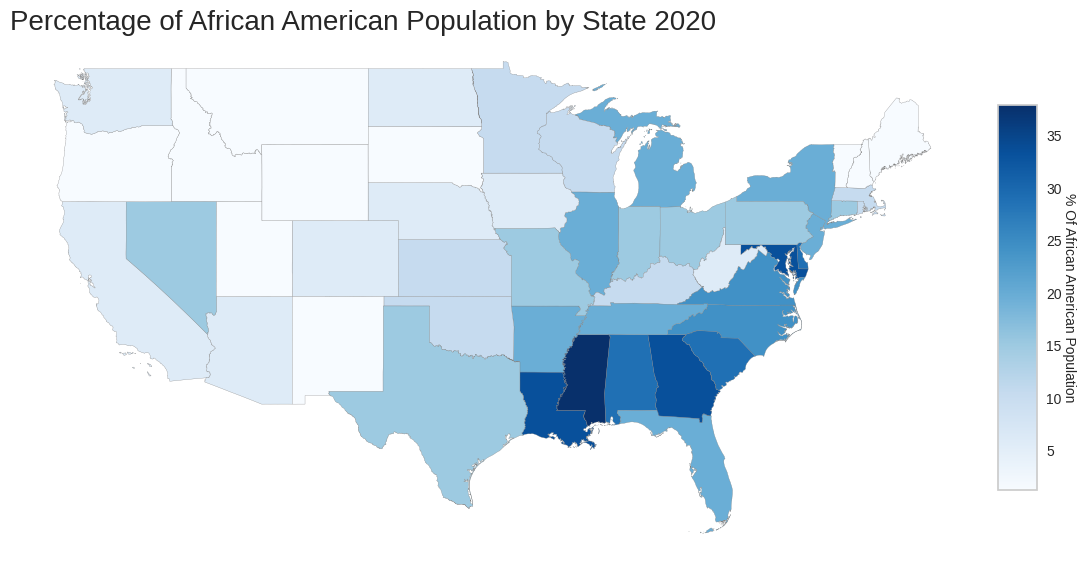

In [169]:
#Cmap colors https://matplotlib.org/stable/users/explain/colors/colormaps.html
#If I work on this for my dissertation, I want to disaggregate by county or census tract, like https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.michiganpublic.org%2Farts-culture%2F2011-09-29%2Fcensus-releases-numbers-on-the-black-population-in-the-u-s&psig=AOvVaw25X0PrUe_N2YZnxSvt3h95&ust=1739758551515000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCPiQgp6Qx4sDFQAAAAAdAAAAABAE
fig, ax = plt.subplots(1, figsize=(15, 50))

nation.plot(ax=ax, column='Pop', cmap='Blues',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Percentage of African American Population by State 2020",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Blues', norm=mpl.colors.Normalize(
    vmin=nation['Pop'].min(), vmax=nation['Pop'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("% Of African American Population", fontsize=10)
cbar.set_label("% Of African American Population", fontsize=10, rotation=270, labelpad=10)

In [171]:
fig = px.line(usaapop, x="Year", y="Percentage")
fig.show()

## US African American Prsion Population by Percentage

The map below looks similar to the one that shows Black population by state. The two variables are highly correlated (.91). But that is only part of the story.

In [172]:
#I want to know the correlation coefficient in aapopprison of Prison and Pop
nation['Prison'].corr(nation['Pop'])

0.9093150930753652

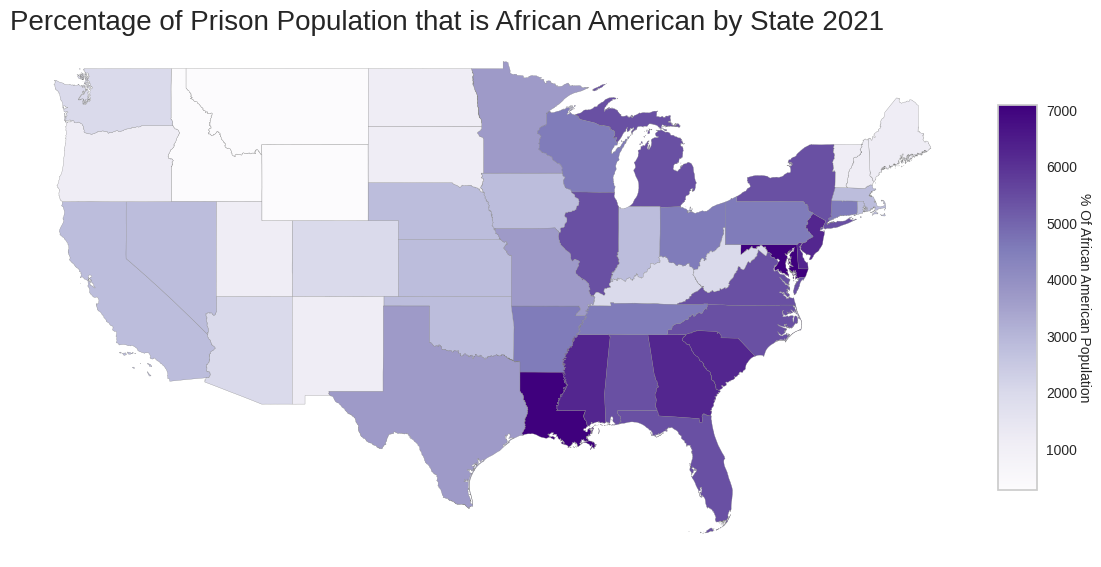

In [173]:
fig, ax = plt.subplots(1, figsize=(15, 50))

nation.plot(ax=ax, column='Prison', cmap='Purples',
                       scheme='natural_breaks', k=9, edgecolor='grey',
                       linewidth=.2, legend=False)
ax.set_title("Percentage of Prison Population that is African American by State 2021",
             loc='left', fontsize=20)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

sm = mpl.cm.ScalarMappable(cmap='Purples', norm=mpl.colors.Normalize(
    vmin=nation['Prison'].min(), vmax=nation['Prison'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, aspect=10, shrink=0.10)
cbar.set_label("% Of African American Population", fontsize=10)
cbar.set_label("% Of African American Population", fontsize=10, rotation=270, labelpad=10)

## Comparing Distributions of African American Population and Prison Population

The percentage of Black people in the United states in 2020 was 13% but the mean of the Black population incarcerated in 2021 was nearly three times that. Another number that is astonishing is that there is a state with a Black prison population of more than 70%, but the violin plot shows that there are five states with prison populations of more than 60%. The 75th percentile is almost 50%.

When I list the states with prison populations greater than 60% I was surprised to see the political left leaning states including New Jersey, Delaware and Maryland.

## Grouping by and Aggregating: Census Regions

This is particularly fascinating. The Population, Difference in Population and Prison/Pop by region is surprising. There is a lot to unpack here, but the difference between the different regions is stark and the visualizations generally support the first rule of georgraphy. Looking at the numbers, the maps, scatter plots tell a story that upon cursory glance I have not found elsewhere. I am saving this for deeper analysis and I am curious to read the literature to understand more.

I hypothesize the the prison population for Blacks is higher in states close to major metropolitan areas like Maryland for DC and New jersey for New York, but it does not explain why the prison population is Black, just that there would be a high prison population.



In [211]:
nation[['Region','Pop', 'Prison','Prison/Pop','Rel',]].groupby('Region').agg(['mean','min','max','std','skew']).round(2)

Pop                          Prison                           \
            mean  min   max   std  skew     mean     min     max      std   
Region                                                                      
Midwest     9.37  3.0  15.5  4.38  0.18  3215.83   780.0  5340.0  1393.16   
Northeast   9.37  2.2  17.5  5.80 -0.15  3163.33   710.0  6130.0  1949.15   
South      21.67  5.0  37.9  9.62 -0.02  4741.25  1360.0  7090.0  1670.45   
West        4.51  1.2  12.1  3.27  1.25  1306.36   270.0  3040.0   965.38   

                Prison/Pop                                 Rel                \
           skew       mean     min     max    std  skew   mean    min    max   
Region                                                                         
Midwest   -0.29     351.15  243.18  527.27  92.67  0.62  16.03   0.50  32.45   
Northeast  0.04     348.81  281.14  436.36  56.40  0.44   8.02   0.19  16.68   
South     -0.68     229.91  162.01  280.41  34.30 -0.33  41.02  13.15  87.15   
West       0.79     282.06  193.33  398.59  61.81  0.54   3.85   0.64  12.40   

                        
             std  skew  
Region                  
Midwest    12.16  0.03  
Northeast   7.28  0.05  
South      23.08  0.57  
West        3.25  1.91

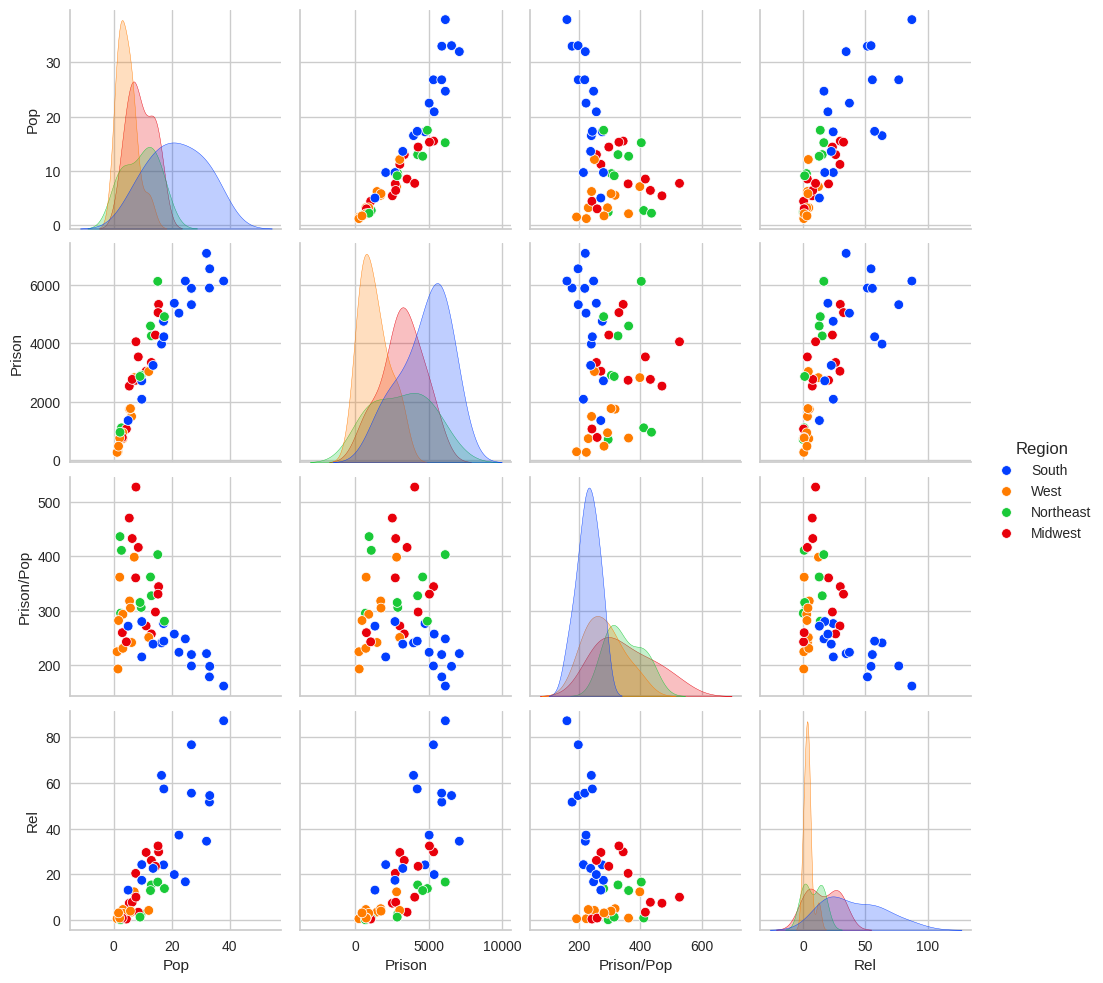

In [190]:
sns.pairplot(nation, vars=["Pop", "Prison", "Prison/Pop", "Rel"], hue="Region", palette="bright")

In [198]:
fig = px.scatter(
    nation,
    x="Pop",
    y="Prison",
    size="Prison/Pop",
    color="Region",
    hover_name="State",
    size_max=40,
    opacity=0.75,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Prison Population vs Total Population by State",
    xaxis_title="Total Population",
    yaxis_title="Prison Population",
    template="plotly_white"
)

fig.show()

In [202]:
fig = px.scatter(
    nation,
    x="Rel",
    y="Prison",
    size="Pop",
    color="Region",
    hover_name="State",
    size_max=40,
    opacity=0.75,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Prison Population vs Total Population by State",
    xaxis_title="Total Population",
    yaxis_title="Prison Population",
    template="plotly_white"
)

fig.show()

In [216]:
nation[['Party','Pop', 'Prison','Prison/Pop','Rel',]].groupby('Party').agg(['mean','min','max','std','skew']).round(2)

Pop                           Prison                                \
          mean  min   max    std  skew     mean    min     max      std  skew   
Party                                                                           
Dem      11.11  2.7  24.7   7.00  0.49  3372.86  740.0  6140.0  1964.50  0.11   
Divided  12.65  1.2  33.1  10.52  1.07  3510.00  270.0  7090.0  2163.39  0.07   
Rep      13.34  1.5  37.9  10.72  0.93  3083.50  290.0  6140.0  1945.69  0.09   

        Prison/Pop                                  Rel                      \
              mean     min     max     std  skew   mean   min    max    std   
Party                                                                         
Dem         313.38  231.25  411.11   59.18  0.45  10.59  0.96  29.87   8.58   
Divided     316.92  198.19  527.27  101.53  0.66  19.46  0.19  54.48  17.45   
Rep         259.72  162.01  470.37   66.97  1.64  28.28  0.50  87.15  27.43   

               
         skew  
Party          
Dem      0.79  
Divided  0.63  
Rep      0.82

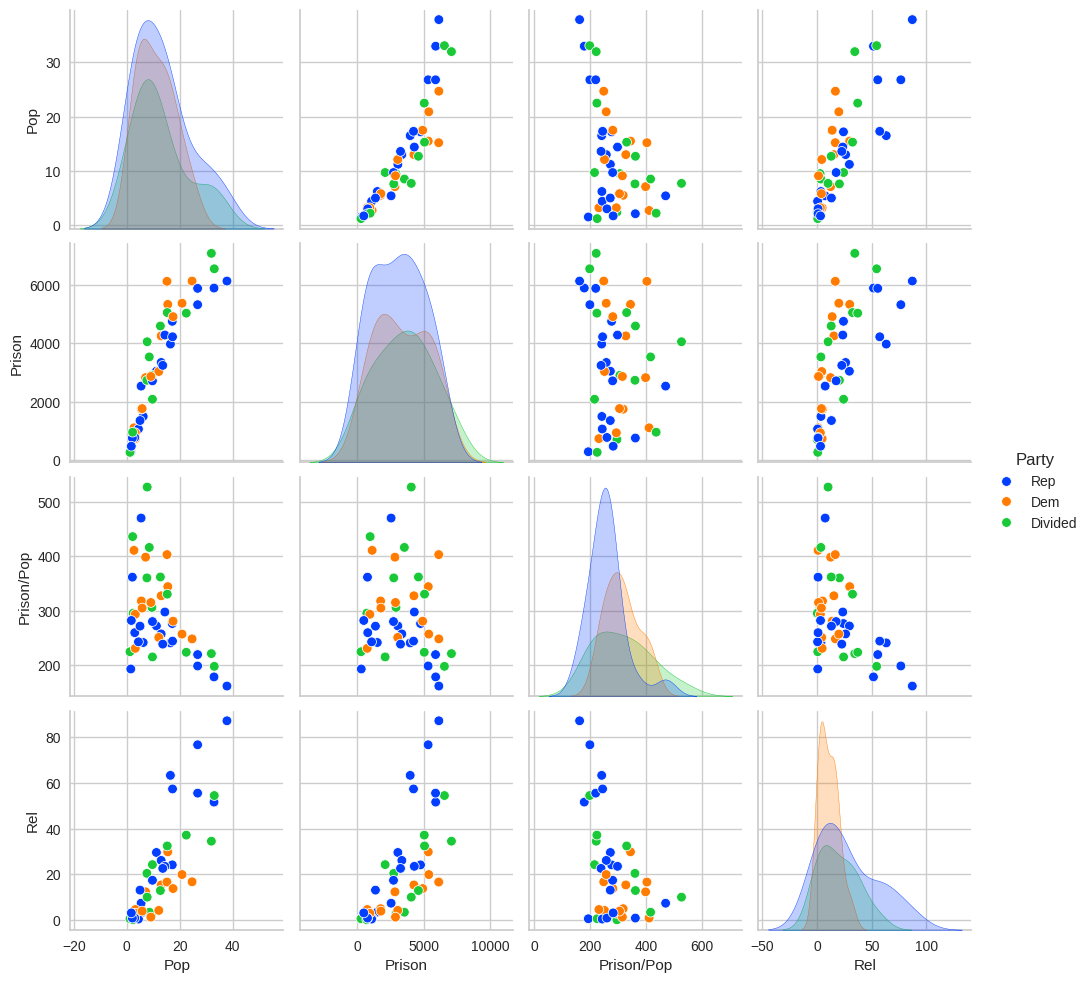

In [193]:
sns.pairplot(nation, vars=["Pop", "Prison", "Prison/Pop", "Rel"], hue="Party", palette="bright")

In [199]:
fig = px.scatter(
    nation,
    x="Pop",
    y="Prison",
    size="Prison/Pop",
    color="Party",
    hover_name="State",
    size_max=40,
    opacity=0.75,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Prison Population vs Total Population by State",
    xaxis_title="Total Population",
    yaxis_title="Prison Population",
    template="plotly_white"
)

fig.show()

In [221]:
fig = px.scatter(
    nation,
    x="Pop",
    y="Rel",
    size="Pop",
    color="Party",
    hover_name="State",
    size_max=40,
    opacity=0.75,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Black Protestant: Adherence Rate per 1,000 (2020) vs Total Population by State",
    xaxis_title="Total Population",
    yaxis_title="Black Protestant: Adherence Rate per 1,000 (2020)",
    template="plotly_white"
)

fig.show()

In [222]:
fig = px.scatter(
    nation,
    x="Prison",
    y="Rel",
    size="Pop",
    color="Party",
    hover_name="State",
    size_max=40,
    opacity=0.75,
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title="Black Protestant: Adherence Rate per 1,000 (2020) vs Total Population by State",
    xaxis_title="Total Population",
    yaxis_title="Black Protestant: Adherence Rate per 1,000 (2020)",
    template="plotly_white"
)

fig.show()

## Mapping Quantitative Data Using Categories

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



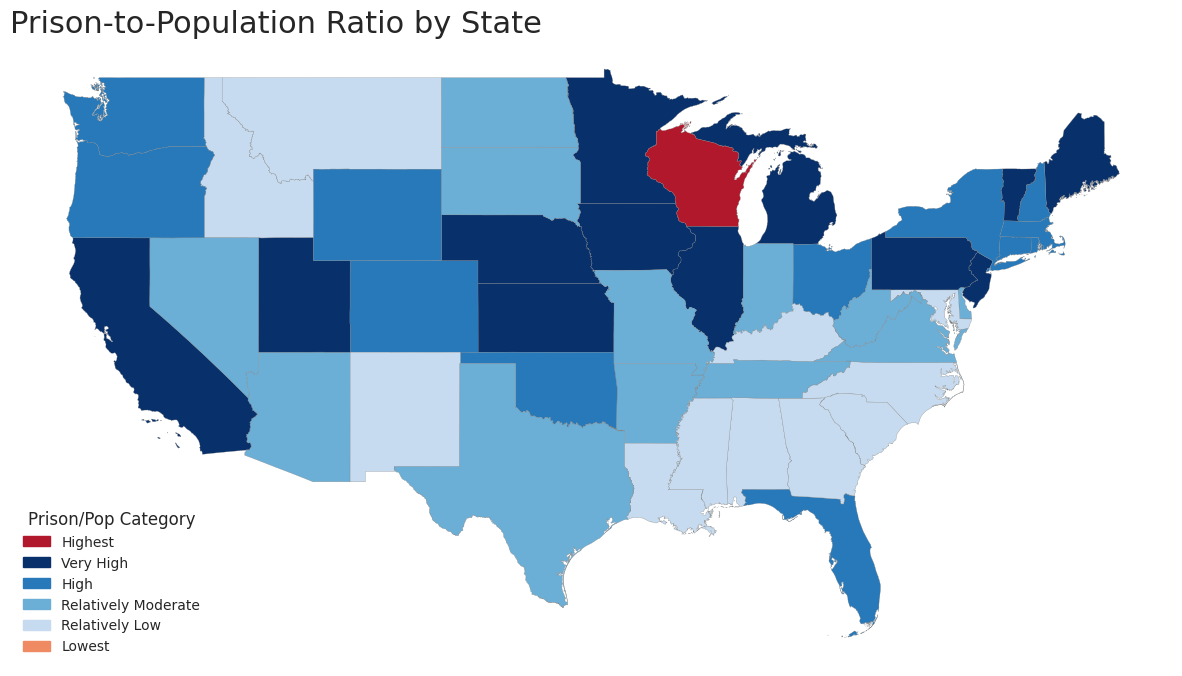

In [ ]:
category_colors = {
    "Highest": "#b2182b",  # Dark Red
    "Very High": "#08306b",  # Darkest Blue
    "High": "#2879b9",       # Medium-Dark Blue
    "Relatively Moderate": "#6baed6",  # Medium-Light Blue
    "Relatively Low": "#c6dbef",        # Lightest Blue
    "Lowest": "#ef8a62"  # Light Red
}

# Create the 'Category Color' column based on the 'Prison/Pop Category' column
# before attempting to plot. This maps the categories to their respective color codes.
aapopprisonstates['Prison/Pop Category Color'] = aapopprisonstates['Prison/Pop Category'].map(category_colors)

fig, ax = plt.subplots(1, 1, figsize=(15, 50))

aapopprisonstates.plot(ax=ax,
                       color=aapopprisonstates['Prison/Pop Category Color'],
                       edgecolor='grey', linewidth=0.2, legend=False)

ax.set_title("Prison-to-Population Ratio by State", loc='left', fontsize=22)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
ax.legend(handles=legend_patches, title="Prison/Pop Category", loc='lower left', fontsize=10)

plt.show()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



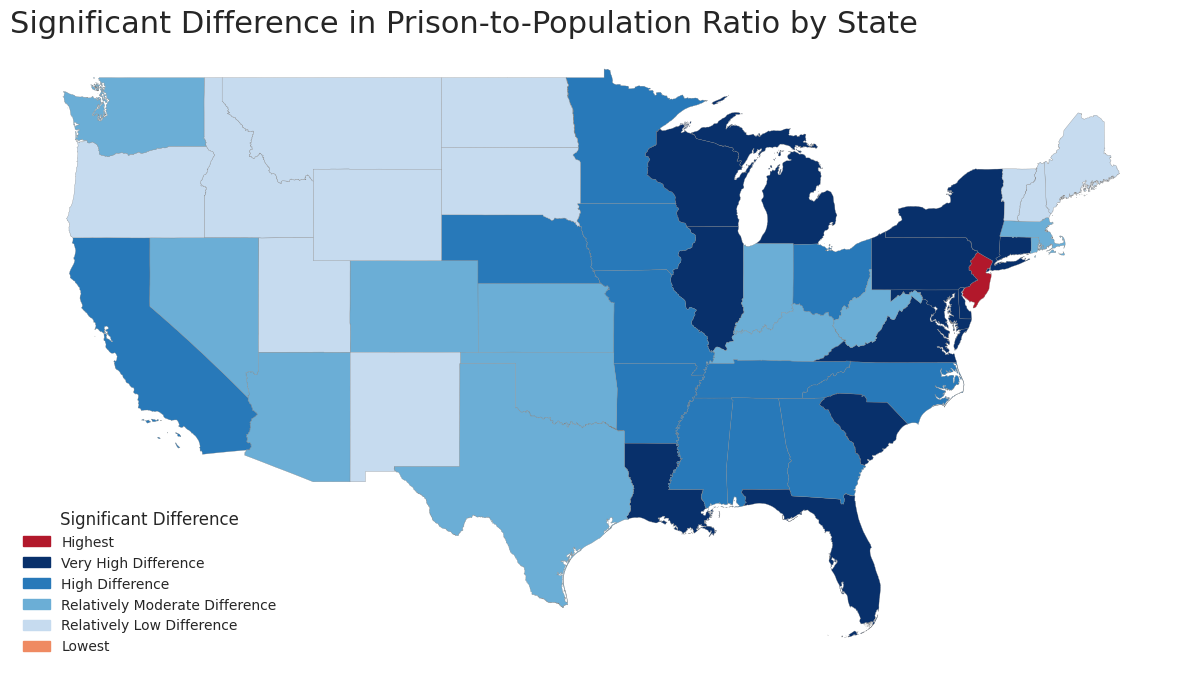

In [ ]:
category_colors = {
    "Highest": "#b2182b",  # Dark Red
    "Very High Difference": "#08306b",  # Darkest Blue
    "High Difference": "#2879b9",       # Medium-Dark Blue
    "Relatively Moderate Difference": "#6baed6",  # Medium-Light Blue
    "Relatively Low Difference": "#c6dbef",        # Lightest Blue
    "Lowest": "#ef8a62"  # Light Red

}

# Rename 'Category Color' column to 'Significant Difference Color' for clarity
aapopprisonstates['Significant Difference Color'] = aapopprisonstates['Significant Difference'].map(category_colors)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

aapopprisonstates.plot(ax=ax,
                       color=aapopprisonstates['Significant Difference Color'],
                       edgecolor='grey', linewidth=0.2, legend=False)

ax.set_title("Significant Difference in Prison-to-Population Ratio by State", loc='left', fontsize=22)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
ax.legend(handles=legend_patches, title="Significant Difference", loc='lower left', fontsize=10)

plt.show()

# Appendix

These Kmeans cluster charts were helpful for me to identify categorical relationships. The mathematical clusters appeared more random but with the names of the states identified, I realized that I needed to see if the first rule of geography held true.

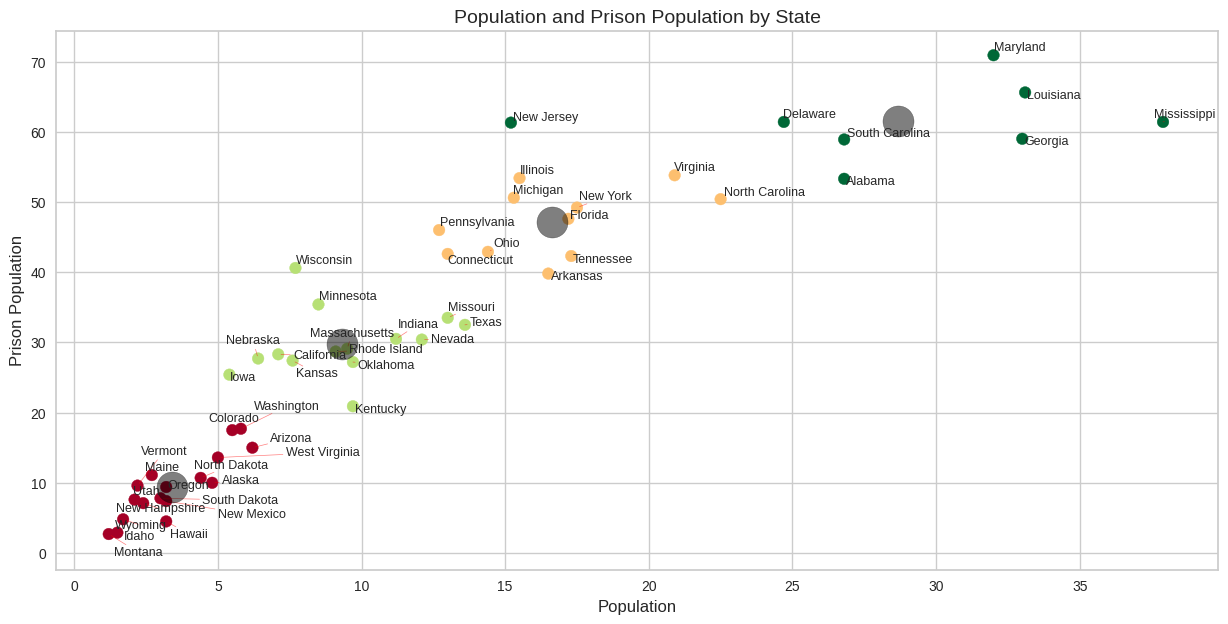

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Prison']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Prison']])

fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(aapopprison.Pop, aapopprison.Prison, c=y_kmeans, s=70, cmap='RdYlGn')

texts = [ax.text(row['Pop'], row['Prison'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Prison Population", fontsize=12)
ax.set_title("Population and Prison Population by State", fontsize=14)
plt.show()

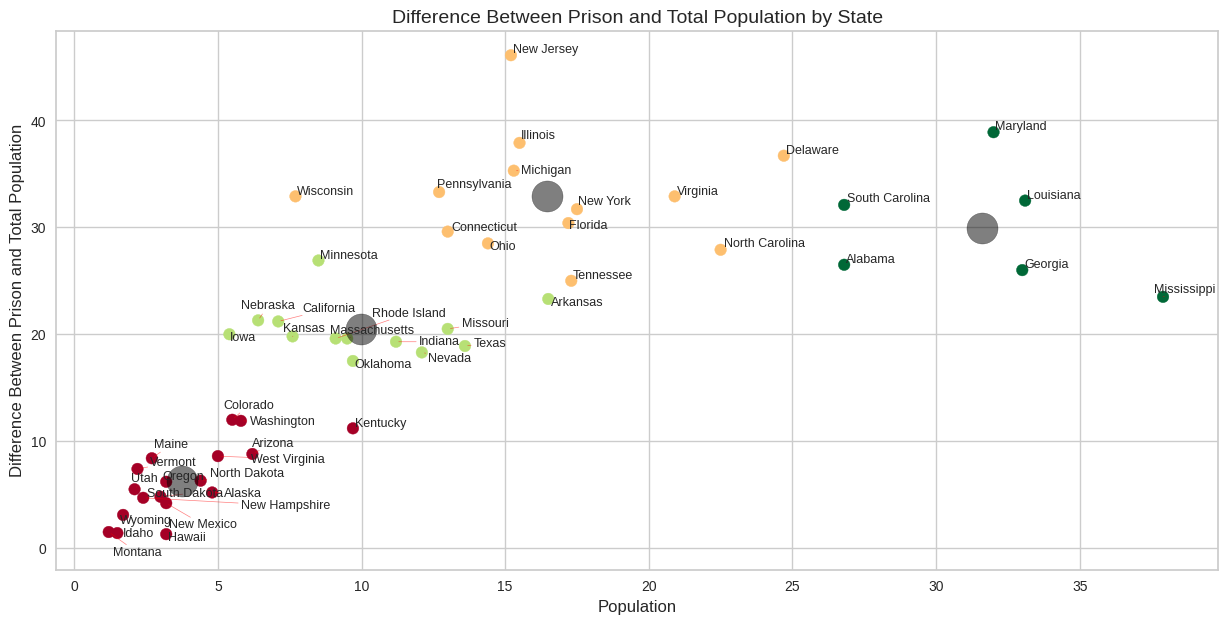

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Difference']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Difference']])

fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(aapopprison.Pop, aapopprison.Difference, c=y_kmeans, s=70, cmap='RdYlGn')

texts = [ax.text(row['Pop'], row['Difference'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Difference Between Prison and Total Population", fontsize=12)
ax.set_title("Difference Between Prison and Total Population by State", fontsize=14)
plt.show()

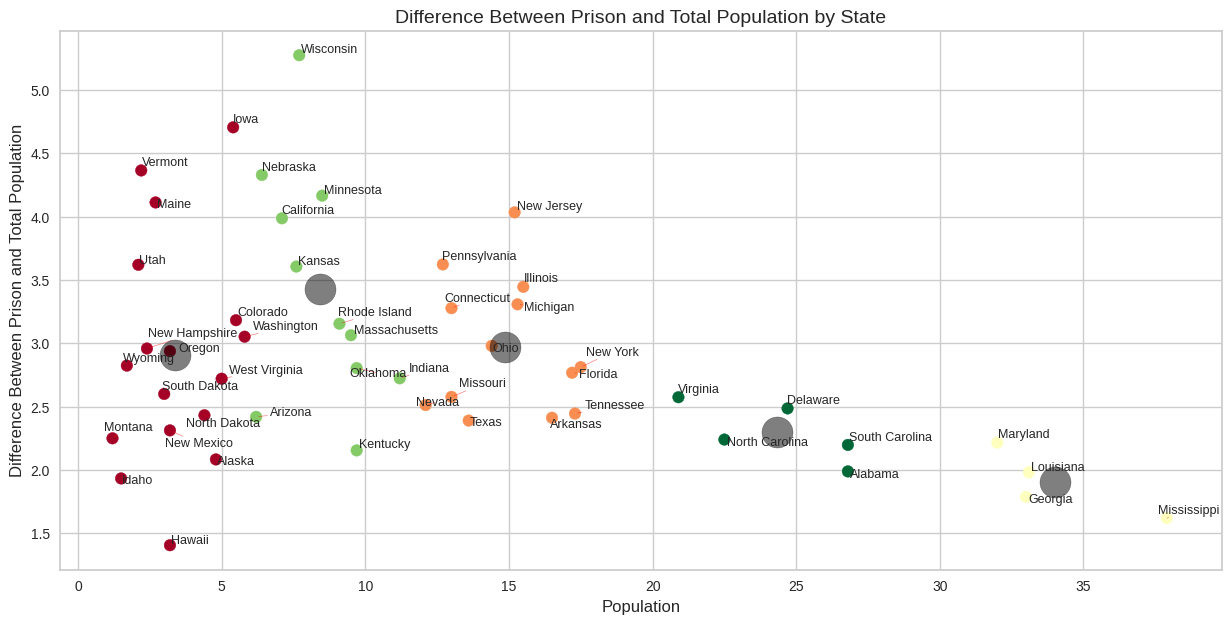

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(aapopprison[['Pop', 'Prison/Pop']])
y_kmeans = kmeans.predict(aapopprison[['Pop', 'Prison/Pop']])

fig, ax = plt.subplots(figsize=(15, 7))

# Referencing 'Pop' and 'Prison' as columns of the DataFrame
ax.scatter(aapopprison['Pop'], aapopprison['Prison']/aapopprison['Pop'], c=y_kmeans, s=70, cmap='RdYlGn')

# Referencing 'Pop', 'Prison', and 'State' as columns within the list comprehension
texts = [ax.text(row['Pop'], row['Prison']/row['Pop'], row['State'], fontsize=9) for idx, row in aapopprison.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', alpha=0.5, lw=0.5))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5)

ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Difference Between Prison and Total Population", fontsize=12) # This label may need to be updated to reflect the ratio being plotted
ax.set_title("Difference Between Prison and Total Population by State", fontsize=14)  # This title may also need to be updated
plt.show()